In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error



In [ ]:
pip install scikit-learn

In [ ]:
data = pd.read_csv('/content/abalone.csv')


data['age'] = data.Rings + 1.5


data.drop('Rings', axis=1, inplace=True)

print("Data loaded Successfully!")

Data loaded Successfully!


In [ ]:
data.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
1569,I,0.475,0.360,0.145,0.6325,0.2825,0.1370,0.190,9.5
1677,M,0.615,0.475,0.175,1.2240,0.6035,0.2610,0.311,10.5
1396,M,0.645,0.510,0.160,1.1835,0.5560,0.2385,0.345,12.5
1656,F,0.600,0.475,0.150,1.1300,0.5750,0.1960,0.305,10.5
201,M,0.500,0.400,0.165,0.8250,0.2540,0.2050,0.285,14.5


In [ ]:
print("No. of rows : ", data.shape[0])
print("No. of columns : ", data.shape[1])

No. of rows :  4177
No. of columns :  9


In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [ ]:
data.isna().mean().to_frame(name='% of missing values')

,% of missing values
Sex,0.0
Length,0.0
Diameter,0.0
Height,0.0
Whole weight,0.0
Shucked weight,0.0
Viscera weight,0.0
Shell weight,0.0
age,0.0


In [ ]:
data.nunique().to_frame("# of unique values")

,# of unique values
Sex,3
Length,134
Diameter,111
Height,51
Whole weight,2429
Shucked weight,1515
Viscera weight,880
Shell weight,926
age,28


In [ ]:
# train test split

train, test = train_test_split(data, test_size=0.25, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 3132
Test data points : 1045


In [ ]:
numerical_features = ["Length", 'Diameter', 'Height','Whole weight',
                      'Shucked weight', 'Viscera weight', 'Shell weight']

categorical_feature = "Sex"

features = numerical_features + [categorical_feature]

target = 'age'

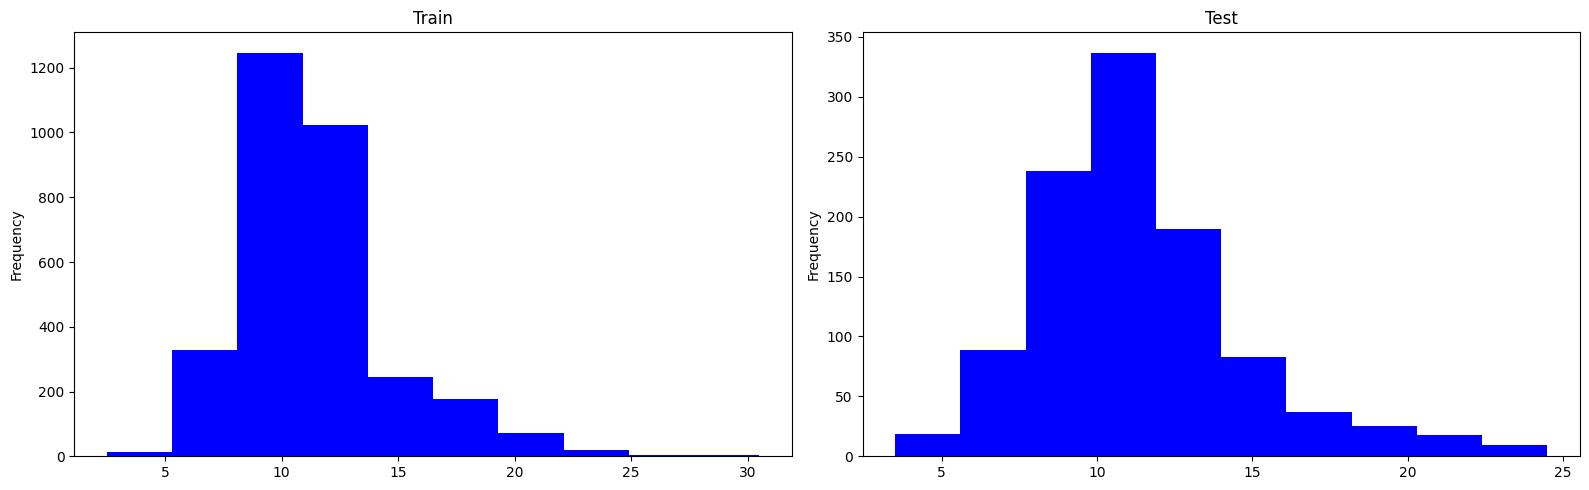

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(16, 5))

train[target].plot.hist(color='blue', ax=axes[0])
axes[0].set(title="Train")

test[target].plot.hist(color='blue', ax=axes[1])
axes[1].set(title="Test")

plt.tight_layout()
plt.show()

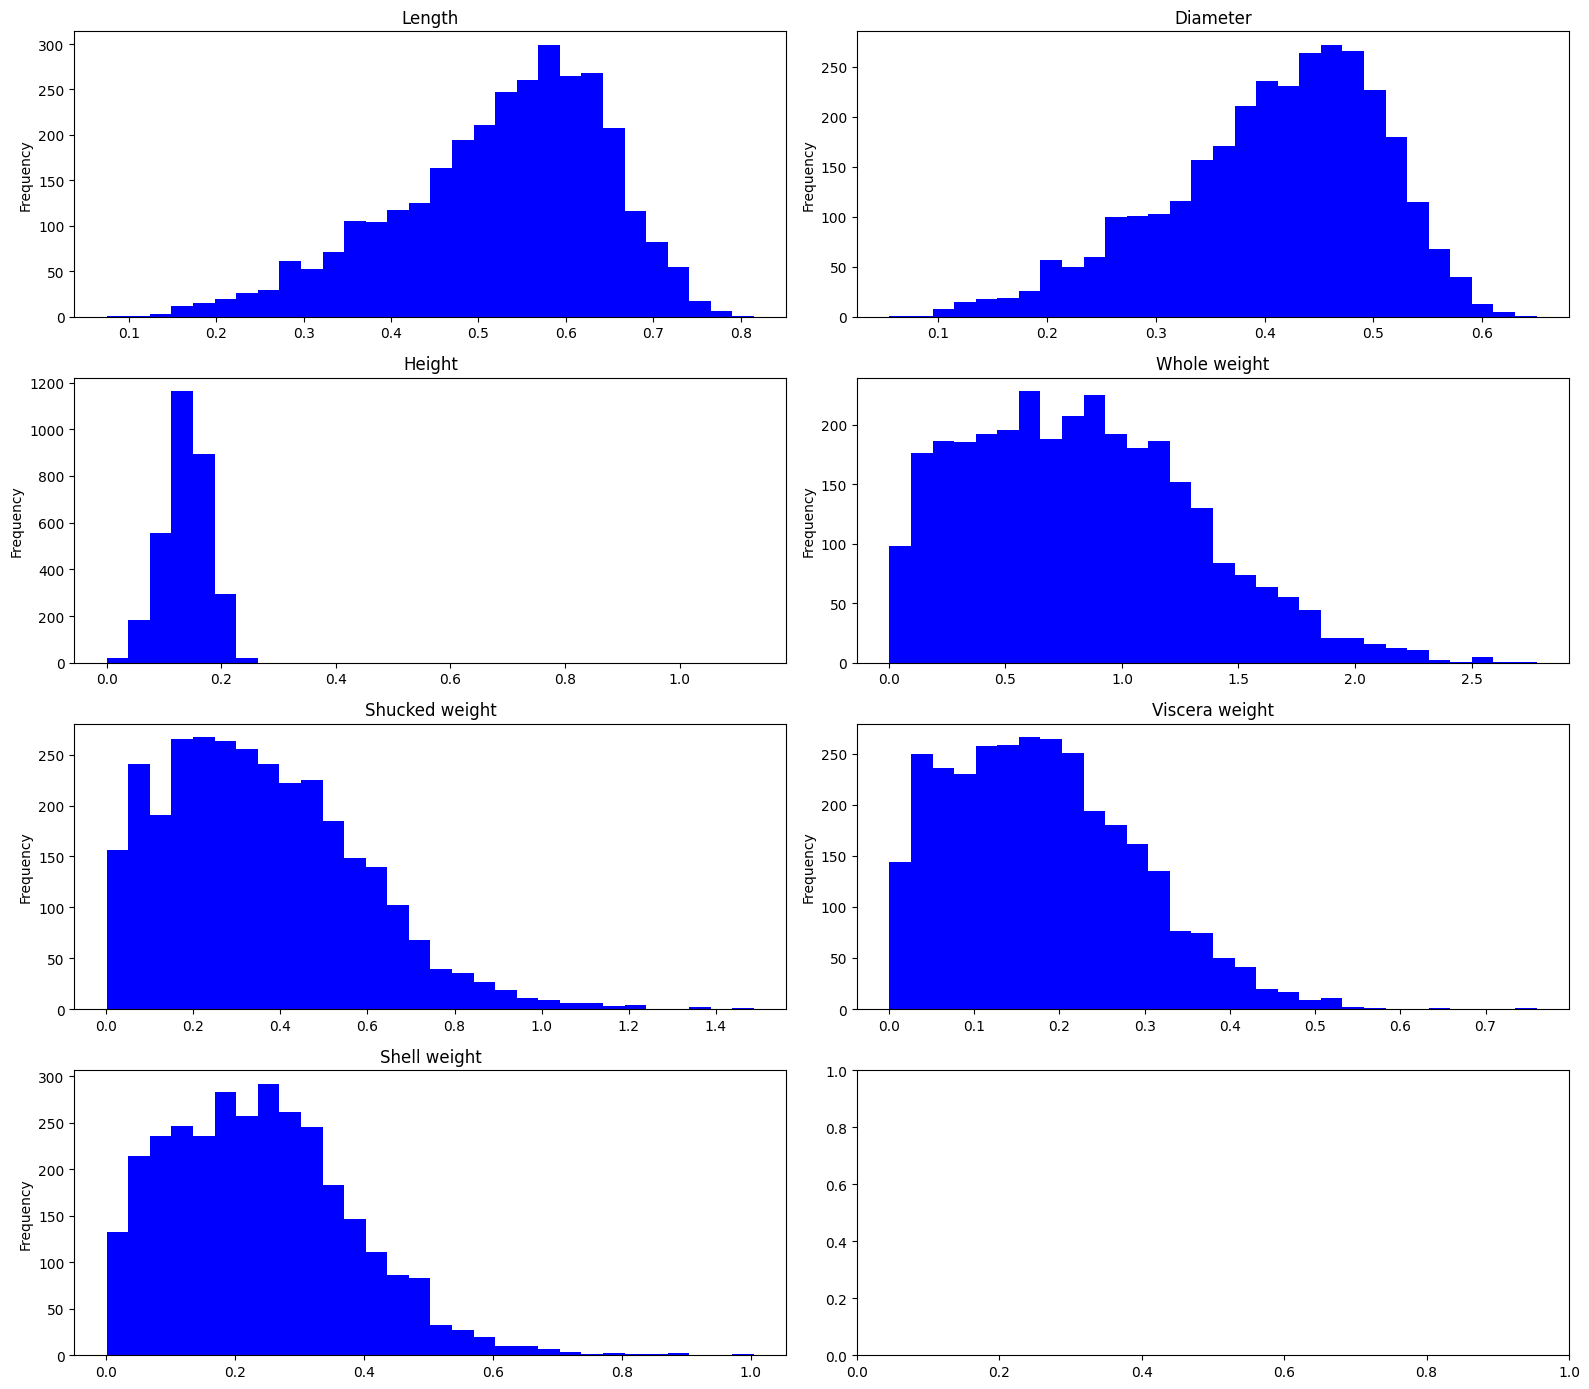

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'hist', ax=axes[i], title=c, color='blue', bins=30)

plt.tight_layout()
plt.show()

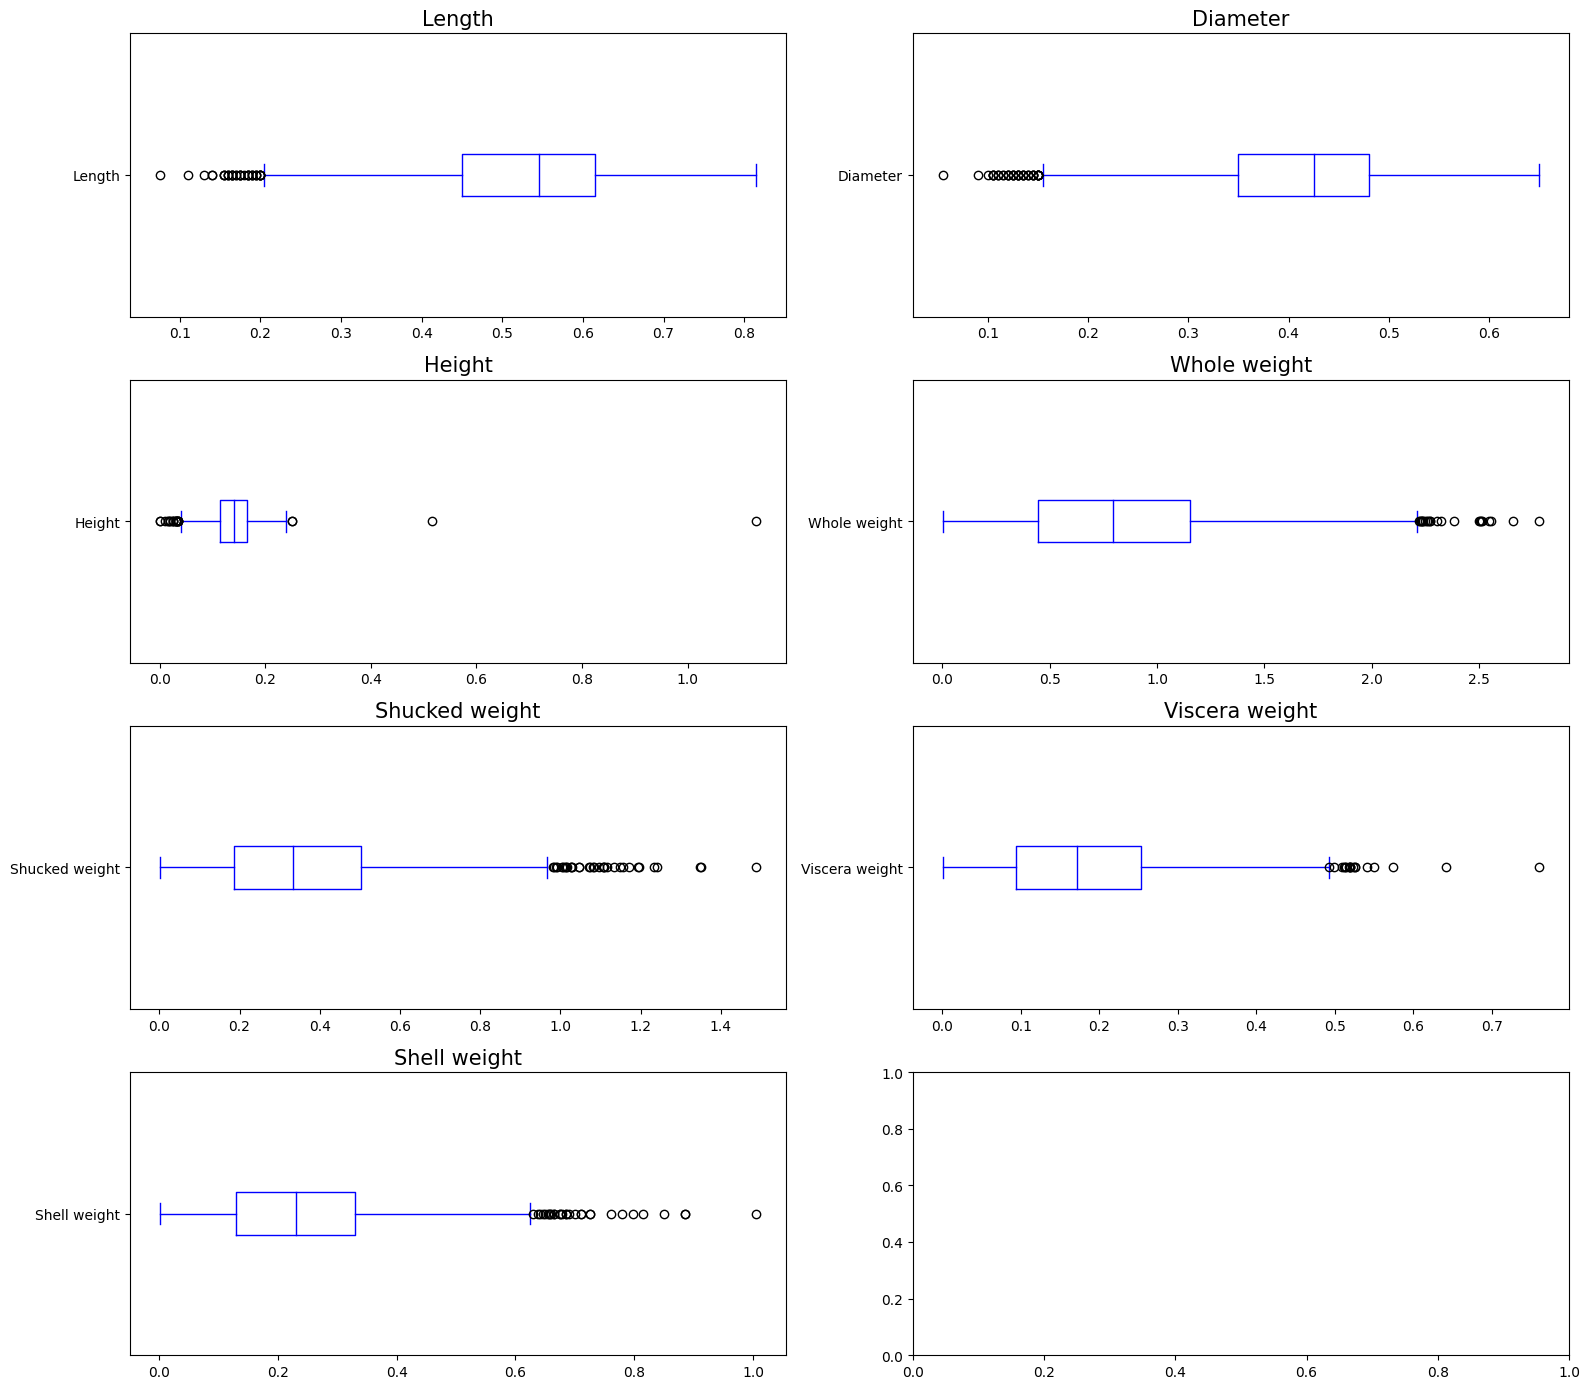

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)

plt.tight_layout()
plt.show()

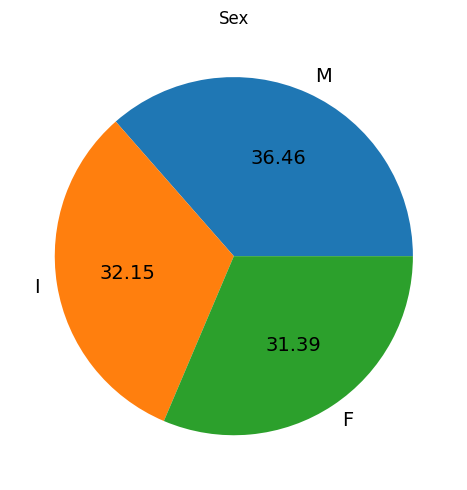

In [ ]:
t = train[categorical_feature].value_counts(normalize=True)
t.plot(kind='pie',
       figsize=(5,5),
       title=categorical_feature,
       ylabel="",
       autopct="%.2f",
       fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-25-05d26f4ed33a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(method='pearson'),


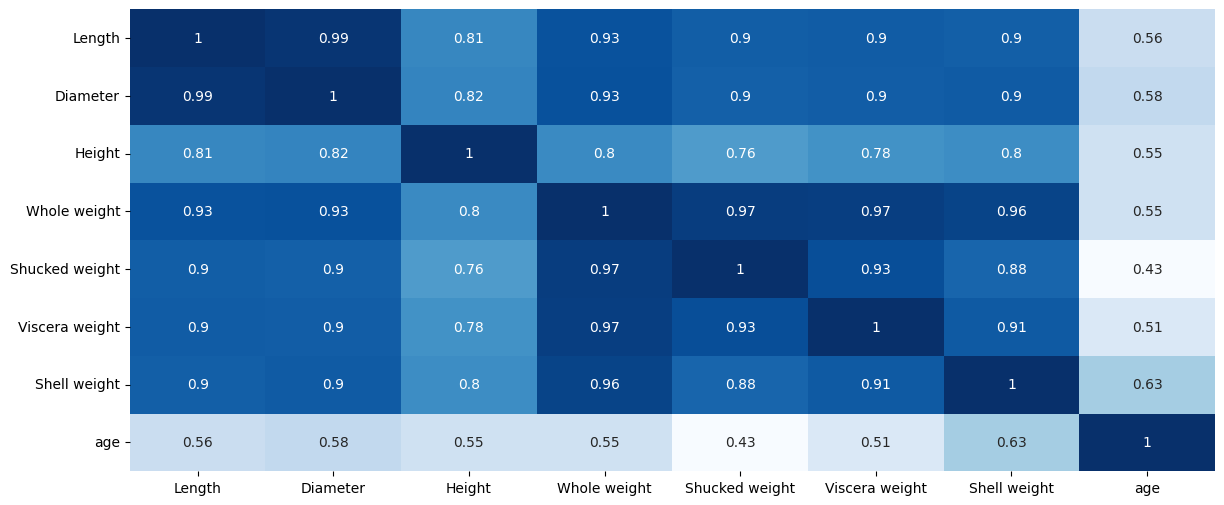

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(train.corr(method='pearson'),
            annot=True,
            cbar=False,
            cmap='Blues')
plt.show()

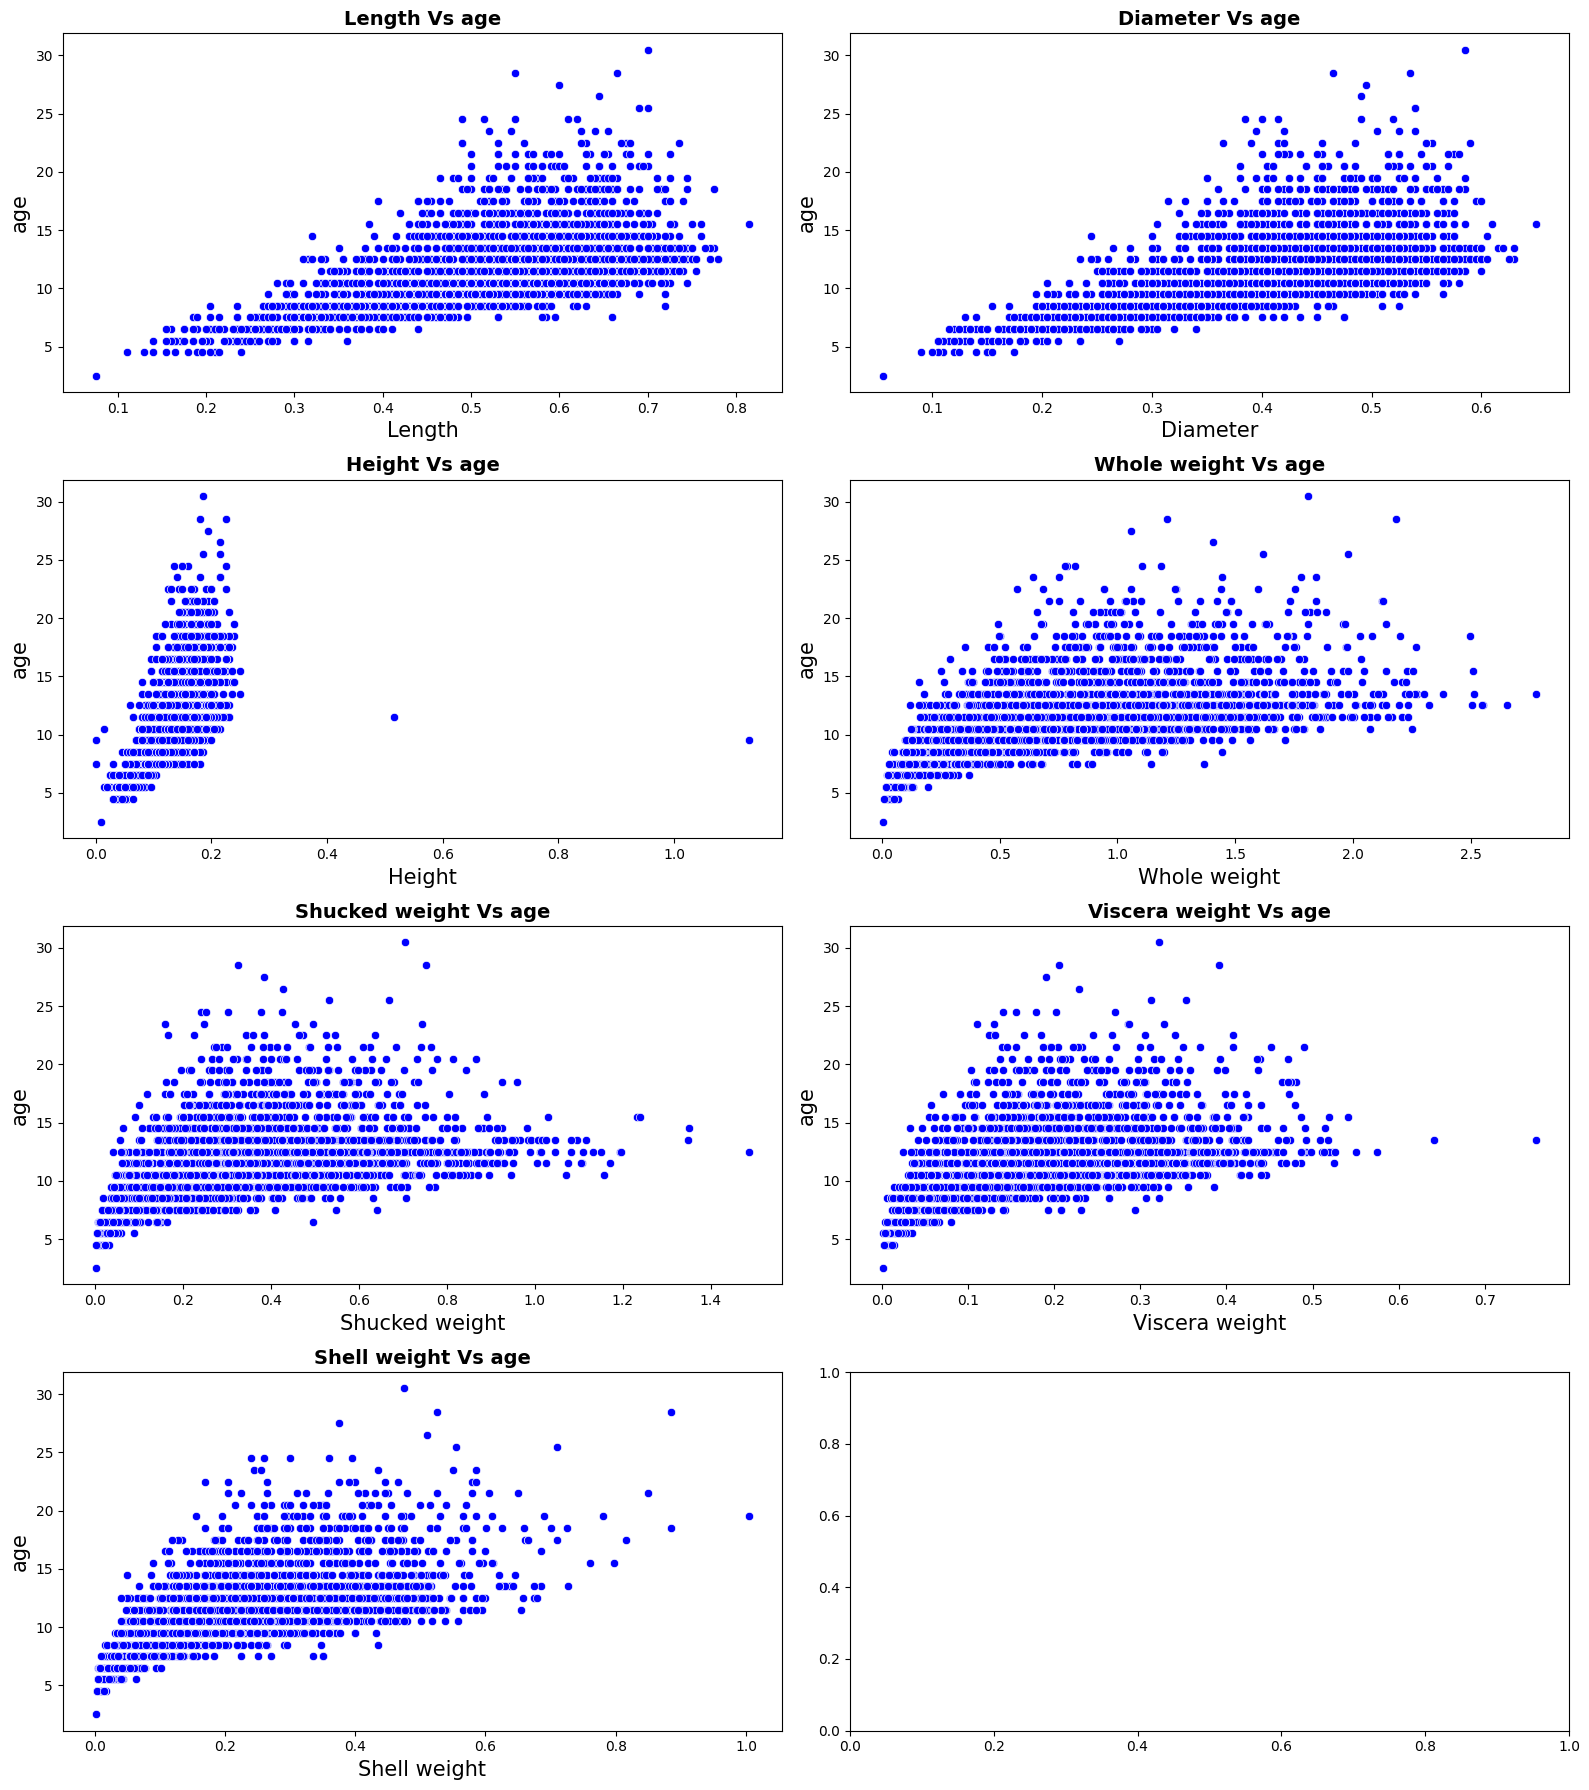

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(16, 18))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    _ = sns.scatterplot(x=train[c],
                        y=train[target],
                        ax=axes[i],
                        color='blue')

    axes[i].set_title(f"{c} Vs age",
                      fontsize=14,
                      fontweight='bold')

    axes[i].set_xlabel(c, fontsize=15)
    axes[i].set_ylabel('age', fontsize=15)

plt.tight_layout()
plt.show()

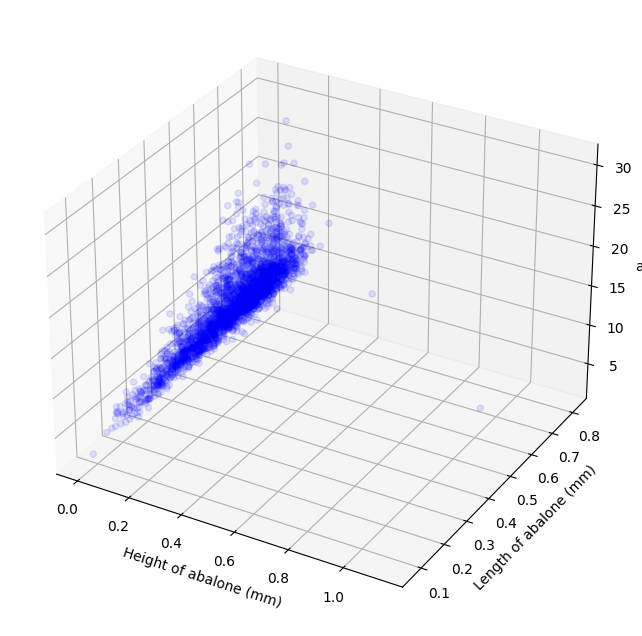

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('Height of abalone (mm)')
ax.set_ylabel('Length of abalone (mm)')
ax.set_zlabel('age')
ax.scatter3D(train['Height'],
             train['Length'],
             train[target],
             c='blue',
             alpha=0.1);

plt.show()

In [ ]:
train.Sex = train.Sex.replace({"M":1, "I":0, "F":-1})
test.Sex = test.Sex.replace({"M":1, "I":0, "F":-1})

In [ ]:
idx = train.loc[train.Height>0.4].index
train.drop(idx, inplace=True)

idx = train.loc[train['Viscera weight']>0.6].index
train.drop(idx, inplace=True)

idx = train.loc[train[target]>25].index
train.drop(idx, inplace=True)

In [ ]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
4014,0.625,0.480,0.175,1.0650,0.4865,0.2590,0.285,1
3252,0.480,0.380,0.130,0.6175,0.3000,0.1420,0.175,1
305,0.200,0.145,0.060,0.0370,0.0125,0.0095,0.011,0
1857,0.505,0.400,0.145,0.7045,0.3340,0.1425,0.207,0
439,0.500,0.415,0.165,0.6885,0.2490,0.1380,0.250,1


In [ ]:
models = {'linear_regression':LinearRegression(),

         'lasso':Lasso(random_state=1),

         'decision_tree':DecisionTreeRegressor(random_state=1),

         'random_forest':RandomForestRegressor(random_state=1),

         'xgboost':XGBRegressor(random_state=1),
        }

In [ ]:
def eval_model(regressor, X_train, y_train, X_test, y_test):

    regressor.fit(X_train, y_train)


    y_train_pred = regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))


    y_test_pred = regressor.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Training RMSE: {train_rmse}')
    print(f'Testing RMSE: {test_rmse}')
for key, regressor in models.items():
    print(key)
    eval_model(regressor, X_train, y_train, X_test, y_test)
    print("\n------------------------------------------")

linear_regression
Training RMSE: 2.1601637766834694
Testing RMSE: 2.1993326495103673

------------------------------------------
lasso
Training RMSE: 3.1425445775484584
Testing RMSE: 3.2071190143034873

------------------------------------------
decision_tree
Training RMSE: 0.0
Testing RMSE: 2.8672378052018894

------------------------------------------
random_forest
Training RMSE: 0.7983734867135102
Testing RMSE: 2.1456051220373515

------------------------------------------
xgboost
Training RMSE: 0.7269540609103852
Testing RMSE: 2.238766654273115

------------------------------------------


In [ ]:
# Linear regression
lr_params = {'fit_intercept':[True,False]}

# Lasso
lasso_params = {'alpha': [1e-4, 1e-3, 1e-2, 1, 10, 100]}

# Decision tree
dt_params =  {'max_depth': [4, 6, 8, 10, 12, 14, 16, 20],
            'min_samples_split': [5, 10, 20, 30, 40, 50],
            'max_features': [0.2, 0.4, 0.6, 0.8, 1],
            'max_leaf_nodes': [8, 16, 32, 64, 128,256]}

# Random Forest
rf_params = {'bootstrap': [True, False],
             'max_depth': [2, 5, 10, 20, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [100, 150, 200, 250]}

# XGBoost
xgb_params = {'n_estimators':[100, 200, 300] ,
             'max_depth':list(range(1,10)) ,
             'learning_rate':[0.006,0.007,0.008,0.05,0.09] ,
             'min_child_weight':list(range(1,10))}

In [ ]:
params = [lr_params, lasso_params, dt_params, rf_params, xgb_params]

# searching Hyperparameters
i=0
for name, model in models.items():
    print(name)
    regressor = RandomizedSearchCV(estimator = model,
                                   n_iter=10,
                                   param_distributions = params[i],
                                   cv = 3,
                                   scoring = 'neg_root_mean_squared_error')

    search = regressor.fit(X_train, y_train)

    print('Best params :',search.best_params_)
    print("RMSE :", -search.best_score_)
    i+=1
    print()

linear_regression
Best params : {'fit_intercept': True}
RMSE : 2.1685158384088488

lasso


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params : {'alpha': 0.0001}
RMSE : 2.168463202118033

decision_tree
Best params : {'min_samples_split': 40, 'max_leaf_nodes': 32, 'max_features': 0.8, 'max_depth': 20}
RMSE : 2.326476932034858

random_forest


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best params : {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
RMSE : 2.121227391666767

xgboost
Best params : {'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 2, 'learning_rate': 0.09}
RMSE : 2.1479748391011477



In [ ]:
rf_params = {'n_estimators': 200,
             'min_samples_split': 2,
             'min_samples_leaf': 4,
             'max_features': 'sqrt',
             'max_depth': None,
             'bootstrap': True}

model = RandomForestRegressor(random_state=1, **rf_params)

model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=200,
                      random_state=1)

In [ ]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


print("Train rmse : ", rmse(y_train, model.predict(X_train)))
print("Test rmse : ", rmse(y_test, model.predict(X_test)))

Train rmse :  1.5313840467501842
Test rmse :  2.146490954202156


In [ ]:
df = pd.DataFrame([features, model.feature_importances_]).T
df.columns = ['feature', 'importance']
df.sort_values("importance", ascending=False)

,feature,importance
6,NaN,0.247956
3,NaN,0.157105
2,feature3,0.135278
5,NaN,0.124763
4,NaN,0.1204
1,feature2,0.109247
0,feature1,0.08051
7,NaN,0.024743


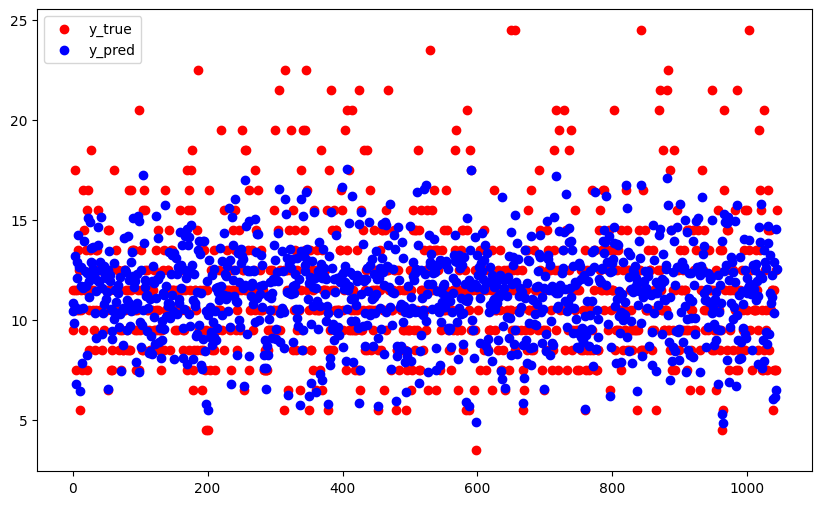

In [ ]:
y_pred = model.predict(X_test)

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color='red', label='y_true')
plt.scatter(range(y_test.shape[0]), y_pred, color='blue', label='y_pred')
plt.legend()
plt.show()

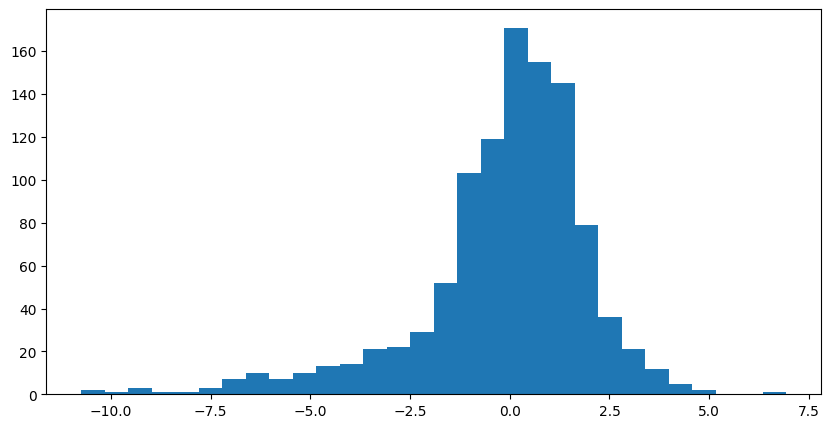

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(y_pred-y_test, bins=30)
plt.show()

In [ ]:
def predict_age(x):
    x = pd.DataFrame([x], columns=features)
    age = model.predict(x)
    return round(age[0],2)

In [ ]:
# Incorrect
df = pd.DataFrame(data, columns=['col1', 'col2', 'col3'])

# Correct (assuming your data has 8 columns)
df = pd.DataFrame(data, columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8'])
print(data)


     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      